In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib, json

In [2]:
url = "http://api.pathofexile.com/ladders?id=Standard&limit=200"

In [3]:
response = urllib.urlopen(url)

In [4]:
data = json.loads(response.read())

In [5]:
classes = []
for i in range(0,199):
    classes.append(data['entries'][i]['character']['class'])

In [6]:
classesList = []
for i in range(0, len(classes)-1):
    classSample = (classes[i], 1)
    classesList.append(classSample)

In [7]:
def histogram(words):
    count = map(lambda x: x[1], words)
    word = map(lambda x: x[0], words)
    plt.barh(range(len(count)), count, color = 'blue')
    plt.yticks(range(len(count)), word)

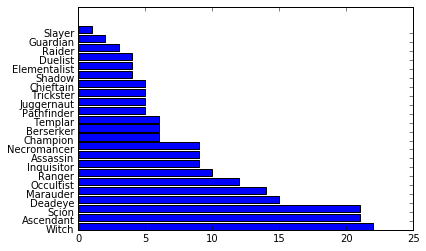

In [8]:
classesCount = sc.parallelize(classesList)
classesCount = classesCount.countByKey().items()
classesCount = sc.parallelize(classesCount)
histogram(classesCount.takeOrdered(len(classesCount.countByKey().items()), key = lambda x: -x[1]))